In [1]:
GROUP_NUMBER = "63"
STUDENT_NAME1 = "Job Mulder"
STUDENT_NUMBER1 = "4538323"
STUDENT_NAME2 = "Sam Bekkers"
STUDENT_NUMBER2 = "4571770"

In [2]:
# Note: this block is a check that you have filled in the above information.
# It will throw an AssertionError until all fields are filled
assert(GROUP_NUMBER != "")
assert(STUDENT_NAME1 != "")
assert(STUDENT_NUMBER1 != "")
assert(STUDENT_NAME2 != "")
assert(STUDENT_NUMBER2 != "")

---

## Introduction
We are in the year 2121. The newest sport sensation is solar robot racing. Similar to Formula 1, the races are held on different tracks, however times have changed and those are no longer in different countries but on different planets. The Earth track is well-known for its lush green surroundings, the Mars track for its bright red environment, the Saturn track is instantly recognizable for the brownish soil, and a new race track is currently being built on Neptune, promising a soothing blue background.

Like in good old fashioned car racing, no modifications of the car are allowed between races, and in particular the AI cannot be changed. That means we need to develop one single machine learning model that is able to drive on all planets. From past competitions we have data from Earth, Mars, and Saturn (i.e., the 3 datasets provided) but we do not have any data from Neptune yet (i.e., this is a hidden test set), making this season extra challenging. However, we have the possibility to collect more data on 3 planets and can also use test tracks on planets not participating in the competition (i.e., the provided code that allows to collect more data and to change some properties of the environment).

As you are just starting out as a solar robot racing AI engineer, you first get the familiarization assignment to train a model solely for Earth before moving on to designing a competition-grade AI.

## Robot car AI

In this competition, the robot car's actions need to be determined based on only the robot car's last observation (i.e. sensor measurements). More technically: the goal is to create a function $f(observation) \rightarrow action$, which the robot can continuously apply in a loop on its sensor measurements to determine its next action. This type of function is often called a *policy*.

In this assignment, the input and output of the policy function $f$ are defined as:
- the input `observation` will be an RGB image (a numpy array) containing a top-down view of the robot's surroundings, including the road ahead.
- the output `action` should be an integer out of one of the possible actions (an integer between 0 and 4):
    0. Do nothing
    1. Accelerate
    2. Turn steer left
    3. Turn steer right
    4. Brake

More details will be provided later in the section "0. Code to get you started" below.

Note that the policy function will completely determine the behavior of the robot.
You can think of the robot executing the policy in a never-ending loop (in pseudo-code):
```python
# Pseudo robot main loop with policy f
while True:
    observation = read_sensor_measurement()
    action = f(observation) # apply the policy
    execute_action(action)
```
In fact, the behavior is already implemented for you in a **simulator**. This means you can test a policy function $f$ by plugging it in the simulator and seeing how your robot car behaves!
The simulator also allows us to quantify how well your robot behaved by returning a 'reward' value for each simulation step (a higher reward is better). More details on the rewards will be explained below in Section 0.

## Task description: imitation learning

These type of tasks, where a robot's policy needs to be optimized to achieve a high expected reward for operating in some environment, is often addressed through *reinforcement learning*. However, in this assigment we will *not* use reinforcement learning techniques, but mainly treat the problem as a **supervised classification task**.
The training input (observations) and output (action labels) data will be obtained through demonstrations of humans *manually* controlling the robot car. By training your machine learning models on these demonstrations, you will create an AI which "imitates" how a human would drive. This type of supervised machine learning is therefore called *imitation learning*.

There are some coding challenges and design choices that you have to solve to use human driving demonstrations as labeled data to create your machine learning models. As before, you will have to think about feature extraction, hyperparemeter optimization, evaluation metrics, comparing models, etc.

Once you have trained a classification model, you could define a new policy function which uses your trained model, and test this policy in the simulator. Does your most succesful model also accumulate the most reward in the simulation? Can you make an AI which succesfully drives on known and unknown planets?

## Deliverables
The deadline is **Sunday October 24th, 2021 at 23:59**. Late submission is –1 grade point per day.

* The main deliverable is this Jupyter Notebook, integrating the report (markdown cells) and the code.
* Submission is again in the form of a single ZIP file that *includes your notebook, and all files required to run the notebook and reproduce the results*. This includes all used data/demonstrations (including the ones that were provided), any loadable parameter files, any auxiliary scripts, etc.
* Name the ZIP file "**GroupNumber_final_assignment.zip**", e.g., if you are in group 456, the name would be "456_final_assignment.zip".
* Unlike previous lab assignments, there are no autograded cells or asserts, but we will grade the notebook manually. Therefore, you are free to add cells as you see fit, as long as the required sections are still present in the notebook.
* Make sure that the notebook runs correctly. That is, clear all outputs, restart the kernel and run the notebook from top to bottom. 
* The notebook needs to be able to run within 20 minutes on a high-end PC, performing all steps (also including training, the only exception is hyperparameter optimization which can be commented out).
* In contrast to the practica, please submit the notebook *including* the output (i.e., do not clear the outputs before zipping it up). 


## Grading Criteria
Below you will find an outline of the sections that the notebook needs to contain and what we expect for each part. More specific requirements are listed there as well. The indicated number of points, out of a total of 100, should give you a rough indication of how much effort to put into each part.

In general, we will not focus as much on the performance of the method you design, but rather the _level of understanding and argumentation about your design choices_. So, we are not only interested in WHAT you did, but will put a strong emphasis on your reasoning about the WHY. Try to synthesize rather than describing what you did step by step.

### Quality of the report (20 points)
- Structure & Readability
 - Logical flow
 - Connection between parts
- Academic English
 - Do not use short forms, like "isn't", "wouldn't".
 - Do not use colloquial style, like "a couple of".
 - Spell check and proofread your report.
- Level of detail
 - Strive for elegant, concise text - longer reports do not necessarily yield higher grades.
 - There is no need to re-explain theory. Assume that the target audience of the report has followed the course.
- Figures & Tables
 - Choose figures/plots/tables carefully. Only include those that add to the story of the report. Do not put the burden on the reviewer to figure out which results you basing your conclusions on, but specifically refer (parts of) the specific table/plot/figure when needed.
 - When comparing two or more signals display them in one plot. Explain the colors / line types. The scale of the plots must be carefully chosen in order to clearly convey the information intended. Label the axes in graphs properly (variables and units).
- Citations
 - If you use images, theory and methods beyond what was covered in the course, etc., always reference sources.


### Your implementations and answers (80 points)

The remainder of this notebook follows the following structure:

0. Code to get you starte (0 points, *nothing for you to do here*)
1. Explore & Inspect the Data (5 points)
2. Prepare the Data and Evaluate Features (15 points)
3. Single Planet Action Classification  (35 points)
4. Enabling Generalization (20 points)

Apart from section 0, you will have to implement and answer questions for all of the other 4 sections to earn points. *For each of these 4 sections, we have various questions or implementation tasks that your submission should address. These are listed in the cells at the end of this notebook.*

Note that there is not one best answer to these questions, and the task could be addressed in different ways. We want to know *your* motivation for *your* selected approach.

---

# 0. Code to get you started

Note, you will not have to implement anything in this section, but you are free to play around with what is provided here, or copy parts to new cells in your solutions.

In [1]:
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random

import cv2 # you are allowed to use functions from cv2
import glob

# import the simualtion environment
import car_racing_ro47002 as cr

random.seed(2)

ImportError: DLL load failed while importing cv2: Kan opgegeven module niet vinden.

First, we explore the available planets. The code below generates an image from the 3 planets. You do not need to understand how this code works, but it should help you understand the context of what we are doing.
Note that the images also include your robot car, and the road ahead.

In [2]:
import ipywidgets
from IPython.display import display

# Show screenshot of a sampled environment
def plot_planet_example(planet_id):
    planet = cr.PLANETS[planet_id]
    env = cr.CarRacing(planet)
    env.seed(10)
    env.reset()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title(f'Planet {planet_id}')
    env.close()

ipywidgets.interactive(plot_planet_example, planet_id=(0,2))

interactive(children=(IntSlider(value=1, description='planet_id', max=2), Output()), _dom_classes=('widget-int…

## Loading pre-recorded human demonstrations

You are provided several pre-recorded demonstrations of a human *manually controlling* the robot car on several tracks on several planets.
**You can use this data to train a classifier that you can use to implement one or more better policies, which should (ideally) perform similar to how a human would control the robot car.**

Each provided demonstration ...
* ... contains a sequence of 1000 (observation, action) pairs ...
* ... recorded at a specic planet and track, ...
* ... for convenience, also contains (1000 dimensional) arrays containing the fixed planet's and track's id of these input/output pair.

A demonstration is stored as a python pickle file.
The code below shows how to load the saved demonstrations, and to do some simple pre-processing.

In [5]:
# Look for all the demonstration pickle files in the demonstrations/ directory.
#  The originally provided demo files are called: demo-[planet_id]-[track_id]-[datetime].pickle
#  Any demo files you record yourself are called: demostud-[planet_id]-[track_id]-[datetime].pickle

# CHANGE THIS IF NEEDED: select the pickle file pattern to match ...

# DEMO_FILEPATTERN = 'demo-*-*.pickle'      # only use ORIGINALLY provided demo files
# DEMO_FILEPATTERN = 'demostud-*-*.pickle'  # only use YOUR own collected demo files
DEMO_FILEPATTERN = 'demo*-*.pickle'       # use ALL available demo files

# find the relevant filenames
filenames = glob.glob(f'demonstrations/{DEMO_FILEPATTERN}')
filenames.sort() # ensure the order is well-defined
print(f'Found {len(filenames)} demonstrations')

# in a loop, load the found pickle files
demonstrations = []
for filename in filenames:
    with open(filename, 'rb') as fd:
        demonstration = pickle.load(fd)
        
        actions = demonstration['actions']
        print(f'Loaded {actions.shape[0]} samples from {filename} ...')
        
        demonstrations.append(demonstration)
        
print(np.unique(actions))

Found 15 demonstrations
Loaded 1000 samples from demonstrations\demo-0-0-20211012_155840.pickle ...
Loaded 1000 samples from demonstrations\demo-0-1-20211012_160607.pickle ...
Loaded 1000 samples from demonstrations\demo-0-2-20211012_161107.pickle ...
Loaded 1000 samples from demonstrations\demo-0-3-20211012_161203.pickle ...
Loaded 1000 samples from demonstrations\demo-0-4-20211012_161237.pickle ...
Loaded 1000 samples from demonstrations\demo-0-5-20211012_161457.pickle ...
Loaded 1000 samples from demonstrations\demo-0-6-20211012_161843.pickle ...
Loaded 1000 samples from demonstrations\demo-0-7-20211012_161923.pickle ...
Loaded 1000 samples from demonstrations\demo-0-8-20211012_162117.pickle ...
Loaded 1000 samples from demonstrations\demo-0-9-20211012_162157.pickle ...
Loaded 1000 samples from demonstrations\demo-1-10-20211012_170226.pickle ...
Loaded 1000 samples from demonstrations\demo-1-11-20211012_171117.pickle ...
Loaded 1000 samples from demonstrations\demo-2-12-20211012_171

In [6]:
# we can combine all the observations, actions, planet and track ids
observations = np.concatenate([d['observations'] for d in demonstrations])
actions = np.concatenate([d['actions'] for d in demonstrations])
planet_ids = np.concatenate([d['planets'] for d in demonstrations])
track_ids = np.concatenate([d['tracks'] for d in demonstrations])

# pre-processing: subsample and only keep every n-th sample for efficiency
# this can speed up training

#Extracting data from Earth
earth_observations = observations[:10000]
earth_actions = actions[:10000]

# plt.imshow(observations[60])
# ss = 10
# observations = observations[::ss]
# actions = actions[::ss]
# planet_ids = planet_ids[::ss]
# track_ids = track_ids[::ss]



## Understanding the data

We here take a closer look at format of the demonstration data. The observations (input) are RGB images. The actions (target class labels) are integers.

In [7]:
# count the total number of observations
N = observations.shape[0]

print(f'The data consists of {N} (observation, action) pairs:')
print(f'- observations : a {observations.shape} numpy int8 array, i-th entry contains RGB image of sample i')
print(f'- actions      : a {actions.shape} numpy int array, i-th entry contains action (class) label of sample i')
print(f'- planet_ids   : a {planet_ids.shape} numpy int array, i-th entry contains the planet_id of sample i')
print(f'- track_ids    : a {track_ids.shape} numpy int array, i-th entry contains the track_id of sample i')

The data consists of 15000 (observation, action) pairs:
- observations : a (15000, 96, 96, 3) numpy int8 array, i-th entry contains RGB image of sample i
- actions      : a (15000,) numpy int array, i-th entry contains action (class) label of sample i
- planet_ids   : a (15000,) numpy int array, i-th entry contains the planet_id of sample i
- track_ids    : a (15000,) numpy int array, i-th entry contains the track_id of sample i


We can inspect inspect a single sample in the recorded data:

Action of sample 1:                     1
Planet id where sample 1 was recorded:  0
Track id where sample 1 was recorded:   0


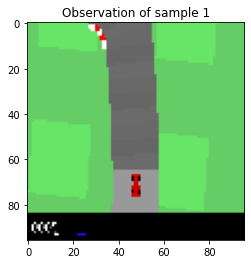

In [8]:
idx = 1
# sample index, should be in range [0, N-1]

print(f'Action of sample {idx}:                    ', actions[idx])
print(f'Planet id where sample {idx} was recorded: ', planet_ids[idx])
print(f'Track id where sample {idx} was recorded:  ', track_ids[idx])

plt.imshow(observations[idx])
plt.title(f'Observation of sample {idx}');

Note that the observation is just a low-resolution image of the simulated environment.

An action (label) is simply an integer. The five possible action values are:

In [9]:
ACTION_NOOP = 0  # NO-OPeration, i.e. do not steer, accelerate or brake
ACTION_ACCEL = 1 # Accelerate
ACTION_LEFT = 2  # Steer left
ACTION_RIGHT = 3 # Steer right
ACTION_BRAKE = 4 # Brake, deaccelerate

You can use the demonstration data to train and validate your machine learning methods.
Of course, you would first need to define some feature extraction procedure(s) to convert the observations into some suitable feature vectors for your machine learning techniques.

## Testing your model in  the simulator


At some point, *after you have trained and evaluated your classifier*, you might want to check how well your classification method can actually control the robot car. For this, you will need to wrap your trained classifier into a policy function that the simulator can use.

This section will go over the details of
* how to start the simulator;
* how to implement a policy $f$;
* how to analyse the rewards.


### Running a simulation

The function `run_simulation` below will setup a simulation of your robot on a given planet (`planet_id`) and track (`track_id`), and will use the policy `f` you provide to control the robot, for a maximum of `iterations` simulation steps. The simulation function can also show you the simulation in a popup-window (set `render=True`), or record all the (observation, actions) pairs (`record_data=True`).

The function signature of run_simulation is:
```
rewards = run_simulation(f, iterations=500, planet_id=0, track_id=0, verbose=False, render=False, record_data=False, delay=0.0)
    Run robot car simulation
    Input arguments:
    - f             # [function] the robot's policy function
    - record_data   # [True/False] if true, return all (observation, action) pairs from the simulation 
    - planet_id     # [int] select the target planet (0=Earth, 1=Mars, 2=Saturn, 3=Neptune)
    - track_id      # [int] select the target track on that planet (0, 1, 2, etc.)
    - iterations    # [int] the maximum number of iterations N to run the simulation
    - render        # [True/False] show the scene in a popup window (can be a bit slower)
    - delay         # [float] a time delay that can be added to make the simulation run a bit slower
    
    Returns:
    - rewards       # [numpy array of floats] all N rewards accumulated during the simulation
    - observations  # [numpy array N x H x W x 3] N observations, each observation being a WxH 3-channel image
    - actions       # [numpy array of ints] all N actions outputted by the given policy f
    
    Note: `observations` and `actions` are only returned if record_data=True
```


In [10]:
# user key input handler
from pyglet.window import key
import time

# keep track if which keys have been pressed in the popup window
# (will be used later for the human driver)
KEY_PRESSED = {key.LEFT: False, key.RIGHT: False, key.UP: False, key.DOWN: False}

def key_press(k, mod):
    global STOP_SIMULATION, KEY_PRESSED
    if k==key.ESCAPE: STOP_SIMULATION = True # set 'quit' flag if ESCAPE key is pressed
    KEY_PRESSED[k] = True

def key_release(k, mod):
    global KEY_PRESSED
    KEY_PRESSED[k] = False

# define the set of all actions    
ACTIONS = [0, 1, 2, 3, 4]
ACTION_NAMES = ['noop', 'accel', 'left', 'right', 'brake']
NUM_ACTIONS = 5 # number of distinct actions

# A lookup table to convert the action class to an actual control input for the simulator (steer, accel, brake)
ACTIONS_TO_CONTROL_INPUT = np.array([
    [ 0,  0,  0   ], # 0 = do nothing
    [ 0,  1,  0   ], # 1 = accelerate
    [-1,  0,  0   ], # 2 = steer left
    [ 1,  0,  0   ], # 3 = steer right
    [ 0,  0,  0.25], # 4 = brake
])

def run_simulation(f, iterations=500, planet_id=0, track_id=0, verbose=False, render=False, record_data=False, delay=0.0):
    """ Run robot car simulation
    Input arguments:
    - f             # [function] the robot's policy function
    - record_data   # [True/False] if true, return all (observation, action) pairs from the simulation
    - planet_id     # [int] select the target planet (0=Earth, 1=Mars, 2=Saturn, 3=Neptune)
    - track_id      # [int] select the target track on that planet (0, 1, 2, etc.)
    - iterations    # [int] the maximum number of iterations N to run the simulation
    - render        # [True/False] show the scene in a popup window (can be a bit slower)
    - delay         # [float] a time delay that can be added to make the simulation run a bit slower
    
    Returns:
    - rewards       # [numpy array of floats] all N rewards accumulated during the simulation
    - observations  # [numpy array N x H x W x 3] N observations, each observation being a WxH 3-channel image
    - actions       # [numpy array of ints] all N actions outputted by the given policy f
    
    Note: `observations` and `actions` are only returned if record_data=True
    """
    
    print(f'Starting simulation for {iterations} iterations.')
    print('*** Press ESC key in popup window to stop the simulation! ***')
    print()

    # create a simulation environment on the given planet
    planet = cr.PLANETS[planet_id]
    env = cr.CarRacing(planet)
    env.seed(track_id+planet_id*1455312) # set environment track generation seed based on planet_id and track_id

    rewards = [] # will store the accumulated rewards
    observations = [] # will store the accumulated observations (only if record_data==True)
    actions = [] # will store the accumulated actions outputted by policy f (only if record_data==True)
    
    # reset KEY_PRESSED state at start of simulation
    global KEY_PRESSED
    KEY_PRESSED = {key.LEFT: False, key.RIGHT: False, key.UP: False, key.DOWN: False}
    
    # the STOP_SIMULATION flag will be set to True if user wants to interrupt the simulation
    global STOP_SIMULATION
    STOP_SIMULATION = False
    completed_iterations = 0
    
    try:
        # reset the simulation, and get the initial observation (robot "sensor measurement")
        observation = env.reset()
        
        # ensure we can listen to user input in the popup window (e.g. to quit when pressing ESCAPE)
        env.viewer.window.on_key_press = key_press
        env.viewer.window.on_key_release = key_release
        
        # main simulation loop
        for itr in range(iterations):
            time.sleep(delay)
            if STOP_SIMULATION: break
                
            # ** APPLYING YOUR POLICY **
            # execute the given policy on the observation to determine the robot's action
            action = f(observation)
            
            # sanity check: is the policy implemented correctly?
            assert (isinstance(action, (int, np.integer))) # returned action should be a builtin or numpy integer
            assert (action in ACTIONS) # action should be an integer 0, 1, 2, 3 or 4

            # hard coded that for the first few iterations, the robot will always accelerate,
            #   to avoid a poor policy from not moving the robot at all
            if itr < 4: action = 1 # action 1 is accelerate
            
            if verbose:
                print(f'iteration {itr}: action = {ACTION_NAMES[action]}')

            if record_data:
                # only store all the observation and action pairs during the simulation
                #   if the record_data argument is set to True
                observations.append(observation)
                actions.append(action)
            
            # ** EXECUTE ACTION ON ROBOT & GET OBSERVATION FOR NEXT TIME STEP **
            ctrl_input = ACTIONS_TO_CONTROL_INPUT[action] 

            # execute simulation step with the given control input
            observation, reward, environment_done, info = env.step(ctrl_input)
            completed_iterations += 1
            
            if verbose:
                print(f'iteration {itr}: reward = {reward}')

            if render:
                # update pop-window visualization
                env.render()

            # collect all rewards in a list
            rewards.append(reward)
    finally:
        # make sure we always close the pop-up window,
        # even if some exception is thrown during the main loop
        env.close()
        
    rewards = np.array(rewards)
    total_reward = np.sum(rewards)
    
    print(f'total reward after {completed_iterations} iterations: {total_reward}')
    print(f'average reward: {total_reward/completed_iterations}')
    
    if record_data:
        return rewards, np.array(observations), np.array(actions, dtype=int)
        
    # by default, only return the rewards

    return rewards

### Implementing a policy

For the simulator, a policy $f(observation) \rightarrow action$ should be implemented as a plain python function which takes a numpy array as input (the observation) and returns an integer (the action).
So generally, a policy implementation would look like this:

```python

def f(observation):    
    # Input: observation, a H x W x 3 numpy array containing an RGB image of the surroundings
    # Output: action,     an integer representing the action (0 = NOOP, ... 5 = Brake)
    # N.B.: actions is just an int, NOT a numpy array
    
    # YOUR CODE
    #   convert observation to feature vector
    #   predict action class given the feature vector using some ML technique
    
    return action
```
*Of course, don't name you policy just `f`, but give it some more descriptive name!*

To illustrate, here is a dummy policy which just picks a random actions (without actually looking at the observation).

In [11]:
# a dummy policy
def f_dummy(observation):
    """ Dummy policy function, which just returns random action. """
    
    # in this dummy policy, we ignore the observation and just select a random action
    action = np.random.randint(0, NUM_ACTIONS)
    
    print(f'Received observation: {observation.shape} numpy array of type {observation.dtype}, returning action {action}')
    return action

We can confirm that the policy returns a valid action label:

In [12]:
action = f_dummy(observations[0])

# returned action should be a builtin int or a numpy integer (NOT a numpy array) in the range [0, 4]
assert (isinstance(action, (int, np.integer)))
assert (action in ACTIONS) # ACTIONS is the set of possible action labels, [0,1,2,3,4]

Received observation: (96, 96, 3) numpy array of type uint8, returning action 1


### Reward

To quantify how well a policy is working, the simulator will return the *rewards* that the robot car collected at each simulation step. The rewards determine how well you are doing in a race, and are based on the number of  segments of the track that the robot racer passes:

* Everytime a new segments of the track is touched by your robot car, your robot receives a positive reward. You can see this in the visualization when a road segments's color changes to a lighter gray.
* The robot car also get a tiny *negative* reward in each time step, as a penalty for spending time.
* When the robot car goes off the track, it will not touch any new track segments and thus only collects negative rewards, but also the friction changes which makes the robot car more difficult to control.

Overall, the goal is to cover as much of the race track as possible in the given number of simulation iterations. So, your robot car should go as fast as possible while staying on the track!

### Illustration of running the simulator with the dummy policy

Let's try to run the simulation with the dummy policy, and render the output in the popup-window for the default number of iterations.

In [13]:
# # running the simulation with the dummy policy
# rs = run_simulation(f_dummy, render=1, planet_id=0, track_id=0)

Clearly, this policy doesn't do anything particularly useful, and should make the robot car just slowly move forward. This policy will touch only few road segments, and therefore collect little positive reward.
Let's visulize the rewards that the robot collected during the simulation.

The first plot below shows when new parts of the track are reached and a large reward is collected. The second plot shows the total/cumulative reward.

In [14]:
# plt.figure(figsize=(10,4)) # create a wide figure (size 10) which is not so tall (size 4)
# plt.subplot(1,2,1) # create subplot of 1 row, 2 columns, enable plotting in first cell
# plt.plot(rs)
# plt.xlabel('iteration')
# plt.ylabel('reward')
# plt.title('Reward per iteration')
# plt.grid()

# plt.subplot(1,2,2) # create subplot of 1 row, 2 columns, enable plotting in first cell
# plt.plot(np.cumsum(rs)) # Cumulative sum of rewards
# plt.xlabel('iteration')
# plt.ylabel('total reward')
# plt.title('Cumulative reward')
# plt.grid()


# print('Average reward:', np.mean(rs))

For comparing and evaluating classifiers, measure the performance of the classifiers themselves, i.e., the macro-F1 score.

Still, the simulation and rewards can help you assess in what situations your robot AI is performing well, and when it is failing.

# Collecting new demonstrations

At some point, you might want to collect more human demonstration data to make your method even beter.
You can do this by:

- manually controlling the robot car in the simulation yourself to generate new demonstrations
- recording the resulting (observation, action) pairs during these demonstrations
- saving the good demonstrations to disk to increase your example dataset

The code below demonstrates how to do this. The idea is simple: just use the regular `run_simulation()` function, but use a special `f_human()` policy which simply returns the action based on the keyboard input!

In [15]:
# a human driver
def f_human(observation):
    # Get the action obtained by the key_press/key_release callbacks from the popup window.
    # Note that the human driver (you!) will of course see the environment image in the popup window,
    # and ignore the 'observation' input of this function.
    # This 'human policy' will therefore return your 'action' response to the visual input by checking
    # which keyboard arrows you pressed.
    
    global KEY_PRESSED
    
    action = ACTION_NOOP
    if KEY_PRESSED[key.LEFT]: action = ACTION_LEFT
    elif KEY_PRESSED[key.RIGHT]: action = ACTION_RIGHT
    elif KEY_PRESSED[key.UP]: action = ACTION_ACCEL
    elif KEY_PRESSED[key.DOWN]: action = ACTION_BRAKE
    
    return action

When we use this policy, ensure that the simulator stores and return all the (observation, action) pairs by setting the `record_data` argument of run_simulation to `True`.
You can adjust the `planet_id` and `track_id` to get human driving responses on a variety of tracks in your training planet environments.

In [16]:
# planet_id=0 # <-- CHANGE THIS to select the planet; can be 0, 1, 2
# track_id=0  # <-- CHANGE THIS to select the track; can be any positive integer

# rs, rec_obs, rec_actions = run_simulation(
#     f_human,               # by using the 'human' policy, YOU determine the robot's actions based on what you see
#     record_data=True,      # record and return all (observation, action) pairs from the simulation 
#     planet_id=planet_id,   # select the target planet
#     track_id=track_id,     # select the target track on that planet (0, 1, 2, etc.)
#     iterations=1000,       # maximum number of iterations to run the simulation
#     render=True,           # when controling the car manually, it makes sense to render the scene
#     delay=0.01             # adding a small delay will help you control the robot car
# )
# # Note: with delay=0.01 the simulation runs a bit slower, which makes it easier to give demonstrations

Explore the just collected samples in your latest recoding using an interactive slider

In [17]:
# def plot_sample(idx, observations, actions):
#     observation = observations[idx]
#     action = actions[idx]
#     plt.clf()
#     plt.imshow(observation)
#     plt.title(f'{idx}: {action}');
    
# ipywidgets.interactive(lambda idx: plot_sample(idx, rec_obs, rec_actions), idx=(0,rec_obs.shape[0]-1))

If you are unhappy with the the demonstration you gave, you can just execute the `run_simulation()` cell above again, until you are satisfied.

To save the demonstration to disk, execute the cell below after setting `SAVE_DEMO` to True.

**After you have saved the demonstration, don't forget to aftewards IMMEDIATELY set `SAVE_DEMO` back to False to avoid accidentally saving new demonstrations every time you rerun the notebook!!!**

Note that the pickle filenames of your recordings will start with `demostud-`, while the originally provided demonstrations start with `demo-`. This makes it easy to load only the original, your, or both types of recordings.

In [18]:
SAVE_DEMO = False # <-- CHANGE THIS to 'True' to SAVE the last recording to disk!

if SAVE_DEMO: 
    rec_N = rec_obs.shape[0]

    demonstration = {
        'observations': rec_obs,
        'actions': rec_actions,
        'planets': planet_id * np.ones(rec_N, dtype=int),
        'tracks': track_id * np.ones(rec_N, dtype=int),
    }
    
    # include date+time to filename in YYYYMMDD_HHMMSS format
    import datetime
    now = datetime.datetime.now()
    dt_str = now.strftime('%Y%m%d_%H%M%S')

    # Save to disk
    save_filename = f'demonstrations/demostud-{planet_id}-{track_id}-{dt_str}.pickle'
    print(f'Saving demonstation of planet {planet_id}, track {track_id} to {save_filename} ...')
    with open(save_filename, 'wb') as fd:
        pickle.dump(demonstration, fd)

Ok, that completes the example code.
Now it is your turn! Implement your solution to the final assignment below. For full points, make sure you address *all* the numbered items for each section, either by implementing something in code cells, or by providing text in Markdown cells. You are free to add as many code and markdown cells as required. Be sure to first read through all sections before you start, so you know what should go where. We are *not* using nbgrader for this final assignment.

**When you are done, double check the "Deliverables" section at the start of this notebook on how to prepare your final submission!**

Good luck!


### ---

# 1. Explore & Inspect the Data (5 points)
Add code and markdown cells to address all of the following points:

1. Create a visualization that shows three samples from each planet for which you have demonstrations
2. Explain in words what you observe: how do the observations from the planets vary?
3. Are the samples i.i.d.? What does that imply for splitting your data?
4. Is there a class imbalance? If yes, what are procedures to deal with that?
5. Do we have a high risk of conflicting labels for observations? What problems can this cause?
6. The data was collected from human demonstrations. What are potential issues with this way of collecting data?

 

### Show samples of the three planets

Inspecting the training data is very important before starting to build a Machine Learning model. Having a clear overview of the characteristics your data samples enables one to obtain an appropriate trainnig method. This entails knowing the values, shapes, distributions and other properties of the data samples. The data samples for this assignment are colored pixels. Each observation is a 96x96x3 array, namely 3 RGB values per pixel and 96x96 pixels per observation. 

The code below plots three different track samples on the three different planets. The observations from different planets only vary in the color of the background. In the next cell block, the class distribution is calculated. The class distribution shows a class imbalance, which means that attention should be paid to selecting the training data. In order to train our models sufficiently, the imbalance should be reduced. This is done by filtering the data based on their label: keeping count of the distribution of the class labels resulted in a more evenly distributed training data over the classes.

Each sample is the result of a human controller racing through various tracks. The samples are not correlated (i.e. the label of one sample does not influence the label of another sample) and therefore the data is independent. After inspecting the class distributions, it becomes obvious the data samples are not identically distributed over the classes. To make up for this, not only the training data was filtered by class, but also the training data is shuffled before training the classifiers.

There is a risk of conflicting certain labels for observations, namely the labels (0) - Do nothing and (1) - Accelerate. If the road is curved left or right, the corresponding action should not easily classifiable. However, on a straight road, both accelerating and doing nothing are good options and might be interchanged by the classifier. 


15000

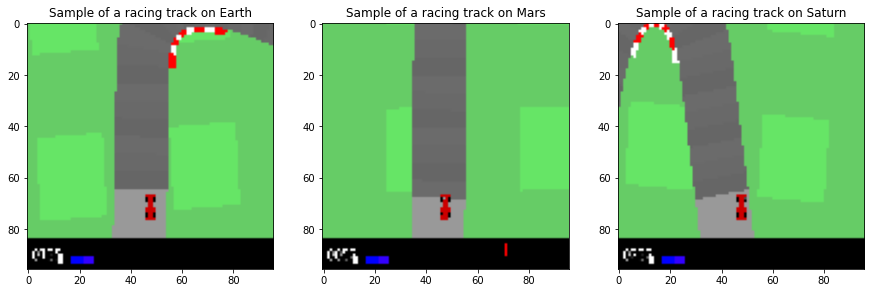

In [19]:
plt.figure(figsize = (15, 15))

plt.subplot(1, 3, 1)
plt.imshow(observations[200])
plt.title('Sample of a racing track on Earth')
plt.subplot(1, 3, 2)
plt.imshow(observations[1100])
plt.title('Sample of a racing track on Mars')
plt.subplot(1, 3, 3)
plt.imshow(observations[1300])
plt.title('Sample of a racing track on Saturn');
len(actions)

In [20]:
class_distribution = np.bincount(actions)
print('The classed are distributed as:', class_distribution)

The classed are distributed as: [7014 3179 2932 1815   60]


---

# 2. Prepare the Data and Evaluate Features (15 points)

In this section you should pre-process the data, e.g., down-sample, and extract features to create your training data matrix "X".


## 2.1. Clustering observations from planets

Before we turn towards the main task of action classification (section 2.2), let us first try a small unsupervised clustering task. Pretend that we only have the observations, but did not record the planet_ids of these observations. The goal is to cluster the observations into k=3 clusters such that 1 cluster (approximately) corresponds to 1 planet. For this task, you can ignore the actions and track_id information.

1. Propose a feature extraction method `feat_extract_clust` which can be used to CLUSTER the samples and (approximately) recover the planet_ids. Motivate what you use in your feature extraction method.
2. Perform clustering based on the features obtained with `feat_extract_clust`, and compare the results to the true planet_id labels. For this you will need to select a statistical measure to compare cluster labels to planet_ids.
3. Explain what measure you use for comparing the features and why.
4. Can you recuperate the planet_ids by clustering? Motivate your answer with your results.

### Visualizing the data

The observations from different planets show the most variance in background color. In order to cluster the samples, the average color of each sample is calculated. The samples are now only 3-dimensional, which we can visualize by plotting in 3D using the following functions (which we imported from previous assignments). 

In [21]:
from mpl_toolkits.mplot3d import axes3d

def make_3d_plot_axes_equal(ax):
    """ Utility function to make axes equally scaled for 3D plots in matplotlib.
        Note that for 2D plots we can simply use ax.axes('equal'),
        but unfortunately this doesn't work for 3D plots, so we use this utility function.
        
        Inspired by: https://stackoverflow.com/a/31364297
    """ 
    
    ax_limits = np.array([ax.get_xlim3d(), ax.get_ylim3d(), ax.get_zlim3d()]).T
    
    m = ax_limits.mean(axis=0)
    max_range = (ax_limits - m).max();
    
    ax.set_xlim(m[0] - max_range, m[0] + max_range)
    ax.set_ylim(m[1] - max_range, m[1] + max_range)
    ax.set_zlim(m[2] - max_range, m[2] + max_range)

def plot_3d_data(X, view_angle1, view_angle2, label_name='dim'):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')

    ax.view_init(view_angle1, view_angle2)
    
    ax.scatter(X[:,0], X[:,1], X[:,2], s=5., alpha=0.7)

    plt.xlabel(label_name+' 0')
    plt.ylabel(label_name+' 1')
    ax.zaxis.set_label_text(label_name+' 2') # no plt.zlabel() :-/

    # ensure 3D plot has equally scaled axes
    make_3d_plot_axes_equal(ax)

    plt.show()

### Prepare data and plot with ipywidgets
In the code cell below we calculated the average color of each instance, and plotted all instances in 3D. In this plot, 3 clusters are very clearly distinguishable.

In [22]:
# Prepare data
image_avgs = []
for i in range(len(observations)):
    image_avgs.append(np.average(np.average(observations[i], axis = 1), axis = 0))

image_avgs = np.array(image_avgs)

# Plot data with simple widgets
ipywidgets.interactive(
    lambda view_angle1, view_angle2: plot_3d_data(image_avgs, view_angle1, view_angle2, label_name='feature'),
    view_angle1=(0, 90),
    view_angle2=(0, 360)
)

interactive(children=(IntSlider(value=45, description='view_angle1', max=90), IntSlider(value=180, description…

### Use K-Means to find clusters centers
In de code cell below we calculated the average color of each instance, and plotted all instances in 3D. In this plot, 3 clusters are very clearly distinguishable. Since our clusters are seperated and do not overlap, it is easy to get a high accuracy using a simple clustering method like KMeans. This clustering algorithm searches for 3 clusters which is does with 100% accuracy since there is no overlap between clusters.

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state=0)
y_pred = kmeans.fit_predict(image_avgs)

kmeans.cluster_centers_

print(planet_ids)
print(kmeans.labels_)
print("The accuracy score for this clustering method is:, ", np.count_nonzero(planet_ids == y_pred)/len(y_pred)*100, "%")


def plot_data_with_labels(X, y=None, view_angle1=None, view_angle2=None):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(view_angle1, view_angle2)
    ax.scatter(X[:,0], X[:,1], X[:,2], s=5., alpha=0.7, c=y)  
    ax.set_xlabel('red')
    ax.set_ylabel('green')
    ax.set_zlabel('blue')
        
ipywidgets.interactive(
    lambda view_angle1, view_angle2: plot_data_with_labels(image_avgs, y_pred, view_angle1, view_angle2),
    view_angle1=(0, 90),
    view_angle2=(0, 360)
)



[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
The accuracy score for this clustering method is:,  73.33333333333333 %


interactive(children=(IntSlider(value=45, description='view_angle1', max=90), IntSlider(value=180, description…

## 2.2. Features for action classification

Now we turn to feature exration for the main classification task, which you can reuse also in the later sections of this notebook.

1. Explain: Will you use the same extractor as in step 1; Why (not)?
2. Propose a feature extraction method `feat_extract` which you will use in the subsequent sections to classify *action*, rather than planet_ids.
3. Explain: Are there any important hyperparameters in your feature extractor?
4. Explain: How will you decide on the values for these hyperparameters? What is the trade-off if this hyperparameter is either (too) low or (too) high?
5. Explain: What is the dimensionality of your feature space?
6. Apply your `feat_extract` to all observations to create the data that you will use in the subsequent sections.

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler
from skimage.transform import downscale_local_mean
from skimage import filters
from sklearn.decomposition import PCA

Like mentioned before there is a class inbalance. Therefore a function is written to distribute the data according to desired parameters.

In [25]:
## Distribute the action classes for the training class
def distribute(X, y, a, b, c, d, e, obs):
    observations_distributed = []
    actions_distributed = []
    action_count = [a, b, c, d, e]
    for i in range(len(X)):
        if action_count[y[i]] < obs:
            action_count[y[i]] += 1
            observations_distributed.append(X[i])
            actions_distributed.append(y[i])
    observations_distributed = np.array(observations_distributed)
    actions_distributed = np.array(actions_distributed)
    return observations_distributed, actions_distributed

earth_observations_distributed, earth_actions_distributed = distribute(earth_observations, earth_actions, 0, 400, 650, 650, 0, 1000)


The objective is now to classify a certain action based on the shape of the road ahead. The color of the background should not affect the prediction of the class, and is therefore of no interest anymore. A different feature extraction method should be used for action classification. The feature extraction consists of different substeps:

- Cutting the image
- Grayscaling the image
- Applying a Sobel filter

First we cut the image to a smaller size, since the model does not need the whole observation to determine an action. The classifier only needs to see a small part of the road ahead in order to estimate wheter a turn is coming. Next, we apply a gray filter over all samples to reduce the dimensionality of the data set by a factor 3: each pixel now only contains 1 value between zero and 1 instead of 3 RGB values. To filter out irrelevant features we applied a Roberts filter, which creates a differential map of the observation which shows the gradient of the observation, i.e. where pixels are varying compared to neighbouring pixels. The observations now only show the boundaries of the track.

In [26]:
def feat_extract(X):
    gray = rgb2gray(X)[:,20:80,20:80]
    obs_filter = np.zeros(gray.shape)
    for i in range(len(X)):
        obs_filter[i] = filters.sobel(gray[i])
    obs_filter = obs_filter.reshape(obs_filter.shape[0], obs_filter.shape[1]*obs_filter.shape[2]) 
    return obs_filter

def feature_vector(X):
    gray = rgb2gray(X)[20:80,20:80]
    obs_filter = filters.sobel(gray)
    obs_filter = obs_filter.reshape(1, obs_filter.shape[0]*obs_filter.shape[1]) 
    return obs_filter

X_earth_red = feat_extract(earth_observations_distributed)
# print(earth_actions.shape)
print(X_earth_red.shape)

(2300, 3600)


----

# 3. Single Planet Action Classification  (35 points)
To get started, we will train and test a model that is only suitable for racing on a single planet, i.e., on Earth (planet 0)

As a first step split the data into a training, validation, and test set. You can use the provided data, or collect your own.

## 3.1. Shortlist Promising Models
1. Compare at least 2 models. One of them needs to be a neural network, one of them needs to be not a neural network.
2. For each of the models that you are going to compare, explain what are its relative advantages/disadvantages in terms of training time, test time, and number of model parameters compared to the other choices. Also explain how these considerations relate to the target application, and motivate which type of model would be preferred based on these considerations only (so disregarding the actual quality of the models).
3. If needed, perform dimensionality reduction before training your selection models. Expain why it is (not) needed.
4. Roughly tune those models
5. Evaluate the models in terms of performance, bias, variance, etc.
6. Please use the macro-F1 score (see sklearn documentation) as your main criterion. Looking at confusion matrices, accuracy etc. might also provide valuable insights. Why is the accuracy score potentially problematic in this setting?
7. Pick one algorithm to develop further.


### Promising Models

Three models that were initially tested are:

- Random Forest Classifier
- Neural Network

The Random Forest classifiers is overall well-known for its low computational time and high accuracy in general. A neural network is different from the previous models as it is able to learn and model complex patterns in data samples. Furthermore it has the ability to generalize and make accurate predictions on data sets it has never seen before. 

### Splitting the data in a training, validation and test set
In order to evaluate the model performance, a validation and a test set are needed. The validation set is just like a test set, which can be used to evaluate performance without using the test set. The test set should not be touched untill the final evaluation, otherwise one would be using the test set to tweak the hyperparamters, which results in an unrealistic performance on new data.

In [27]:
from sklearn.model_selection import train_test_split
X_train_earth, X_notTrain, y_train_earth, y_notTrain = train_test_split(X_earth_red, earth_actions_distributed, test_size=0.25, random_state=0)
X_test_earth, X_val_earth, y_test_earth, y_val_earth = train_test_split(X_notTrain, y_notTrain, test_size=0.5, random_state=0)

### Dimensionality reduction using PCA

After feature extraction, the feature space is still quite large. The feature vectors have a length of 3600 features. To reduce the computational load, PCA is applied to reduce the amount of dimensions by selecting and preserving the features which show the most variance. The hyperparameter n_componenets determines how many dimensions are desired in de resulting dataset. If a value between 0 and 1 is given, like 0.95, PCA computes the minimum number of dimension required to preserve 95% of the training set's variance. 

In [28]:
pca = PCA(n_components = 0.95)

X_train_earth_pca = pca.fit_transform(X_train_earth)
X_val_earth_pca = pca.transform(X_val_earth)

### Random Forest


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

def eval_classifier(clf, X, y):
    y_pred = rf_clf.predict(X)
    accuracy = sklearn.metrics.accuracy_score(y, y_pred) 
    confmat =  confusion_matrix(y, y_pred)
    f1score = f1_score(y, y_pred, average='macro')
    return accuracy, confmat, f1score

#Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_earth)
X_val_scaled = scaler.fit_transform(X_val_earth)


In [30]:
rf_clf = RandomForestClassifier(random_state=1, class_weight = 'balanced')
rf_clf.fit(X_train_scaled, y_train_earth)

print(eval_classifier(rf_clf, X_val_scaled, y_val_earth))

(0.6875, array([[109,   3,   5,   7],
       [ 44,  34,   1,   2],
       [ 17,   0,  35,   0],
       [ 11,   0,   0,  20]], dtype=int64), 0.6775950308777527)


The Random Forest classifier obtains a F1 score of 0.677. 

### Neural Network

In this part of the assignment a neural network is build and evaluated. A neural network consists of a variable amount of layers and neurons in each layer. The design and size of a neural network is dependent on the classification task. The layers in this assignments neural network are:
- Input Layer: The amount of neurons in the input layer is equal to the amount of features in the feature vector.
- Hidden Layers: The amount of hidden layers typically varies between 1 and 5. The amount of hidden layers for this network is based on a similar classification task, namely the classification of the Fashion MNIST dataset which uses 2 hidden layers. The number of neurons in each hidden layer varies between 10 and 100. Again, the initial amount was copied from the Fashion MNIST example
- Output Layer: The amount of neurons in the output layer is determined by the amount of different class labels.

For this multiclass classification problem, 'ReLu' activation is used to avoid vanishing gradient problems. The output activation function is set to 'softmax', to convert a vector of numbers (input for the last layer) to a vector of probabilities (output of the last layer). Based on these probabilities, the model makes a prediction for each observation entered in the input layer of the network.

The optimization of the neural network can be done using various methods, like Gradient Descend, Momentum, Adam etc. Adam is an optimizer which is a combination of AdaGrad and Momentum. Adam has the best of both worlds and is therefore able to quickly find a minimum in de loss function.

Early stopping is a regularization technique which is added to prevent the neural network from overfitting. If the validation loss (which should decrease during the training) stops decreasing and starts increasing, it is no longer useful to keep on training the network. Without stopping early, the model will start to overfit which increases the validation loss. 



In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

C:\Users\jobmu\Miniconda3\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jobmu\Miniconda3\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jobmu\Miniconda3\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jobmu\Miniconda3\envs\tf2\lib\site-packages\tensorflow\python\frame

In [32]:
def one_hot_encoding(y_orig):
    y_one_hot = keras.utils.to_categorical(y_orig)
    y_one_hot = y_one_hot.astype(np.uint8)
    return y_one_hot

y_one_hot_train = one_hot_encoding(y_train_earth)
y_one_hot_val = one_hot_encoding(y_val_earth)

In [33]:
import os

checkpoint_path = "learned_weights/weights.best.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)

if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='val_accuracy',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 save_weights_only=False,
                                                 save_freq='epoch',
                                                 verbose=1)

In [34]:
num_input_units = len(X_train_earth_pca[1])
num_logits = len(np.unique(y_train_earth))
NNH = 18
metrics = ['accuracy']   
validation_split = 0.2
epochs    = 30
batch_size = 10
learning_rate = 0.01


In [35]:
tf.random.set_random_seed(1)

def neural_network(n_hidden=2, n_neurons=NNH, learning_rate=learning_rate, metrics = metrics):
    model = tf.keras.models.Sequential()
    for i in range(n_hidden):
        model.add(tf.keras.layers.Dense(NNH, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(tf.keras.layers.Dropout(rate=0.15))
    model.add(tf.keras.layers.Dense(num_logits, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.01)
    model.compile(optimizer=optimizer,
                 loss='categorical_crossentropy',
                 metrics=metrics)
    return model 

In [36]:
# Prevent overfitting with early stopping
early_stopping = keras.callbacks.EarlyStopping(patience=8)
nn = neural_network()
nn.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size,callbacks=[early_stopping])

init_neural_network = keras.wrappers.scikit_learn.KerasClassifier(neural_network)
history = init_neural_network.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size,callbacks=[early_stopping])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 1380 samples, validate on 345 samples
Epoch 1/30
1380/1380 [==============================] - 0s 229us/sample - loss: 1.2715 - acc: 0.4877 - val_loss: 1.1706 - val_acc: 0.5159
Epoch 2/30
1380/1380 [==============================] - 0s 143us/sample - loss: 1.0899 - acc: 0.6188 - val_loss: 1.0919 - val_acc: 0.5797
Epoch 3/30
1380/1380 [==============================] - 0s 126us/sample - loss: 1.0417 - acc: 0.6268 - val_loss: 1.0404 - val_acc: 0.6000
Epoch 4/30
1380/1380 [==============================] - 0s 132us/sample - loss: 1.0135 - acc: 0.6261 - val_loss: 1.0431 - val_acc: 0.5884
Epoch 5/30
1380/1380 [==============================] - 0s 137us/sample - loss: 1.0042 - acc: 0.6377 - val_loss: 1.0120 - val_acc: 0.6029
Epoch 6/30
1380/1380 [==============================] - 0s 126us/sample - loss: 0.9910 - acc: 0.6457 - val_loss: 0.9979 - val_acc: 0.6087
Epoch 7

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


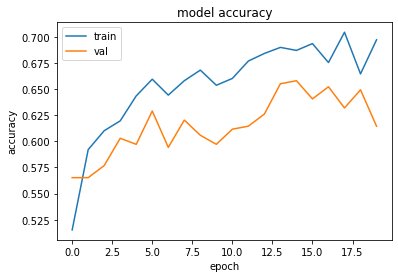

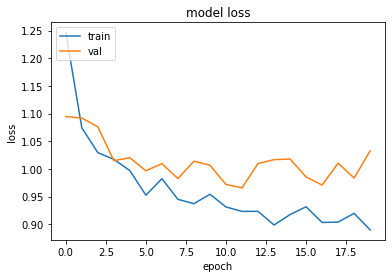

In [37]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 3.2. Fine-Tune the System
1. What are the most important hyperparameters of your chosen algorithm?
2. Perform hyperparameter optimization (including pre-processing steps)
3. Compare at least 3 models with different sets of hyperparameters 
4. Evaluate the final model (similar to “Shortlist Promising Models” above)

### Fine-Tuning the neural network
The most important hyperparameters for the Neural Network are:

- Learning rate 
- Network topology
- Activation function

The learning rate plays a role in the gradient descend of training a neural network, which enables the neural network to find a minimum in the loss function. If the learning rate has a high value, gradient descend takes (too) large steps and might converge to a suboptimal minimum too quickly. If the learning rate is too small however, training will progress very slowly as the updates to the weights and biases in the network are tiny. 

By randomly entering values for the hyperparameters, an optimal combination of hyperparameters can be approached. 

Default values of the neural network:
- Learning rate = 0.01
- Neurons in each layer = 20
- Activation function = 'ReLU'

Another way of finding the optimal values for hyperparameters is using the RandomSearchCV function from sklearn. 

Varying the Learning Rate:

- For a learning rate of 0.1, the validation accuracy was 0.6238 and the validation loss was 1.0741.
- For a learning rate of 0.001, the validation accuracy was 0.6740 and the validation loss was 1.0421.
- For a learning rate of 0.0001, the validation accuracy was 0.6928 and the validation loss was 1.014.

Varying the Network Topology:

- Using 10 neurons in each layer, the validation accuracy was 0.67 and the validation loss was 0.997.
- Using 50 neurons in each layer, the validation accuracy was 0.636 and the validation loss was 1.000.
- Using 100 neurons in each layer, the validation accuracy was 0.627 and the validation loss was 1.0422.

Varying the activation function:

- Using the activation functin 'sigmoid', the validation accuracy was 0.693 and the validation loss was 0.975.
- Using the activation functin 'tanh', the validation accuracy was 0.627 and the validation loss was 1.0381.
- Using the activation functin 'ReLU', the validation accuracy was 0.655 and the validation loss was 1.05.

In [38]:
'''# # Adapting learning rate
early_stopping = keras.callbacks.EarlyStopping(patience=8)

#Learning rate 1
learning_rate = 0.01
keras_iteration1lr = keras.wrappers.scikit_learn.KerasClassifier(neural_network)
history_lr1 = keras_iteration1lr.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size,callbacks=[early_stopping])

#Learning rate 1
learning_rate = 0.0001
keras_iteration2lr = keras.wrappers.scikit_learn.KerasClassifier(neural_network)
history_lr2 = keras_iteration2lr.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

#Learning rate 1
learning_rate = 0.00001
keras_iteration3lr = keras.wrappers.scikit_learn.KerasClassifier(neural_network)
history_lr3 = keras_iteration3lr.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])'''

'# # Adapting learning rate\nearly_stopping = keras.callbacks.EarlyStopping(patience=8)\n\n#Learning rate 1\nlearning_rate = 0.01\nkeras_iteration1lr = keras.wrappers.scikit_learn.KerasClassifier(neural_network)\nhistory_lr1 = keras_iteration1lr.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size,callbacks=[early_stopping])\n\n#Learning rate 1\nlearning_rate = 0.0001\nkeras_iteration2lr = keras.wrappers.scikit_learn.KerasClassifier(neural_network)\nhistory_lr2 = keras_iteration2lr.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])\n\n#Learning rate 1\nlearning_rate = 0.00001\nkeras_iteration3lr = keras.wrappers.scikit_learn.KerasClassifier(neural_network)\nhistory_lr3 = keras_iteration3lr.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])'

In [39]:
'''#PLOT RESULTS
plt.figure(1)
plt.plot(history_lr1.history['val_acc'], 'r', label='val_accuracy')
plt.plot(history_lr1.history['acc'], 'y', label='accuracy')
plt.plot(history_lr1.history['loss'], 'b',label='loss')
plt.plot(history_lr1.history['val_loss'] , 'g', label='val_loss')
plt.title("learning_rate = 0.01")
plt.xlabel('epoch')
plt.ylabel('loss/accuracy')
plt.legend()

plt.figure(2)
plt.plot(history_lr2.history['val_acc'], 'r',label='val_acc')
plt.plot(history_lr2.history['acc'],'y', label='accuracy')
plt.plot(history_lr2.history['loss'], 'b',label='loss')
plt.plot(history_lr2.history['val_loss'], 'g',label='val_loss')
plt.title("learning_rate = 0.0001")
plt.xlabel('epoch')
plt.ylabel('loss/accuracy')
plt.legend()


plt.figure(3)
plt.plot(history_lr3.history['val_acc'], 'r',label='val_accuracy')
plt.plot(history_lr3.history['acc'], 'y',label='accuracy')
plt.plot(history_lr3.history['loss'], 'b',label='loss')
plt.plot(history_lr3.history['val_loss'] , 'g',label='val_loss')
plt.title("learning_rate = 0.00001")
plt.xlabel('epoch')
plt.ylabel('loss/accuracy')
plt.legend()'''

'#PLOT RESULTS\nplt.figure(1)\nplt.plot(history_lr1.history[\'val_acc\'], \'r\', label=\'val_accuracy\')\nplt.plot(history_lr1.history[\'acc\'], \'y\', label=\'accuracy\')\nplt.plot(history_lr1.history[\'loss\'], \'b\',label=\'loss\')\nplt.plot(history_lr1.history[\'val_loss\'] , \'g\', label=\'val_loss\')\nplt.title("learning_rate = 0.01")\nplt.xlabel(\'epoch\')\nplt.ylabel(\'loss/accuracy\')\nplt.legend()\n\nplt.figure(2)\nplt.plot(history_lr2.history[\'val_acc\'], \'r\',label=\'val_acc\')\nplt.plot(history_lr2.history[\'acc\'],\'y\', label=\'accuracy\')\nplt.plot(history_lr2.history[\'loss\'], \'b\',label=\'loss\')\nplt.plot(history_lr2.history[\'val_loss\'], \'g\',label=\'val_loss\')\nplt.title("learning_rate = 0.0001")\nplt.xlabel(\'epoch\')\nplt.ylabel(\'loss/accuracy\')\nplt.legend()\n\n\nplt.figure(3)\nplt.plot(history_lr3.history[\'val_acc\'], \'r\',label=\'val_accuracy\')\nplt.plot(history_lr3.history[\'acc\'], \'y\',label=\'accuracy\')\nplt.plot(history_lr3.history[\'loss\']

In [40]:
'''# # Adapting loss function
learning_rate = 0.001 # set learning_rate back to 0.001

print('Default activation function is relu')

# sigmoid
activation = 'sigmoid'
keras_iteration1ac = keras.wrappers.scikit_learn.KerasClassifier(neural_network)
history_act1 = keras_iteration1ac.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size,callbacks=[early_stopping])

# tanh
activation = 'tanh'
keras_iteration2ac = keras.wrappers.scikit_learn.KerasClassifier(neural_network)
history_act2 = keras_iteration2ac.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])
'''

"# # Adapting loss function\nlearning_rate = 0.001 # set learning_rate back to 0.001\n\nprint('Default activation function is relu')\n\n# sigmoid\nactivation = 'sigmoid'\nkeras_iteration1ac = keras.wrappers.scikit_learn.KerasClassifier(neural_network)\nhistory_act1 = keras_iteration1ac.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size,callbacks=[early_stopping])\n\n# tanh\nactivation = 'tanh'\nkeras_iteration2ac = keras.wrappers.scikit_learn.KerasClassifier(neural_network)\nhistory_act2 = keras_iteration2ac.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])\n"

In [41]:
'''#PLOT RESULTS
plt.figure(1)
plt.plot(history_act1.history['val_acc'], 'r', label='val_accuracy')
plt.plot(history_act1.history['acc'], 'y', label='accuracy')
plt.plot(history_act1.history['loss'], 'b',label='loss')
plt.plot(history_act1.history['val_loss'] , 'g', label='val_loss')
plt.title("activation = sigmoid")
plt.xlabel('epoch')
plt.ylabel('loss/accuracy')
plt.legend()

plt.figure(2)
plt.plot(history_act2.history['val_acc'], 'r',label='val_acc')
plt.plot(history_act2.history['acc'],'y', label='accuracy')
plt.plot(history_act2.history['loss'], 'b',label='loss')
plt.plot(history_act2.history['val_loss'], 'g',label='val_loss')
plt.title("activation = tanh")
plt.xlabel('epoch')
plt.ylabel('loss/accuracy')
plt.legend()'''

'#PLOT RESULTS\nplt.figure(1)\nplt.plot(history_act1.history[\'val_acc\'], \'r\', label=\'val_accuracy\')\nplt.plot(history_act1.history[\'acc\'], \'y\', label=\'accuracy\')\nplt.plot(history_act1.history[\'loss\'], \'b\',label=\'loss\')\nplt.plot(history_act1.history[\'val_loss\'] , \'g\', label=\'val_loss\')\nplt.title("activation = sigmoid")\nplt.xlabel(\'epoch\')\nplt.ylabel(\'loss/accuracy\')\nplt.legend()\n\nplt.figure(2)\nplt.plot(history_act2.history[\'val_acc\'], \'r\',label=\'val_acc\')\nplt.plot(history_act2.history[\'acc\'],\'y\', label=\'accuracy\')\nplt.plot(history_act2.history[\'loss\'], \'b\',label=\'loss\')\nplt.plot(history_act2.history[\'val_loss\'], \'g\',label=\'val_loss\')\nplt.title("activation = tanh")\nplt.xlabel(\'epoch\')\nplt.ylabel(\'loss/accuracy\')\nplt.legend()'

In [42]:
'''# # Adapting loss function
activation = 'relu' # set activation back to relu

# n_neurons = 10
n_neurons = 10
keras_iteration1n = keras.wrappers.scikit_learn.KerasClassifier(neural_network)
history_n1 = keras_iteration1n.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size,callbacks=[early_stopping])

# n_neurons = 50
n_neurons = 50
keras_iteration2n = keras.wrappers.scikit_learn.KerasClassifier(neural_network)
history_n2 = keras_iteration2n.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

# n_neurons = 100
n_neurons = 100
keras_iteration3n = keras.wrappers.scikit_learn.KerasClassifier(neural_network)
history_n3 = keras_iteration3n.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])'''

"# # Adapting loss function\nactivation = 'relu' # set activation back to relu\n\n# n_neurons = 10\nn_neurons = 10\nkeras_iteration1n = keras.wrappers.scikit_learn.KerasClassifier(neural_network)\nhistory_n1 = keras_iteration1n.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size,callbacks=[early_stopping])\n\n# n_neurons = 50\nn_neurons = 50\nkeras_iteration2n = keras.wrappers.scikit_learn.KerasClassifier(neural_network)\nhistory_n2 = keras_iteration2n.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])\n\n# n_neurons = 100\nn_neurons = 100\nkeras_iteration3n = keras.wrappers.scikit_learn.KerasClassifier(neural_network)\nhistory_n3 = keras_iteration3n.fit(X_train_earth_pca, y_one_hot_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])"

In [43]:
'''#PLOT RESULTS
plt.figure(1)
plt.plot(history_n1.history['val_acc'], 'r', label='val_accuracy')
plt.plot(history_n1.history['acc'], 'y', label='accuracy')
plt.plot(history_n1.history['loss'], 'b',label='loss')
plt.plot(history_n1.history['val_loss'] , 'g', label='val_loss')
plt.title("10 neurons per hidden layer")
plt.xlabel('epoch')
plt.ylabel('loss/accuracy')
plt.legend()

plt.figure(2)
plt.plot(history_n2.history['val_acc'], 'r',label='val_acc')
plt.plot(history_n2.history['acc'],'y', label='accuracy')
plt.plot(history_n2.history['loss'], 'b',label='loss')
plt.plot(history_n2.history['val_loss'], 'g',label='val_loss')
plt.title("50 neurons per hidden layer")
plt.xlabel('epoch')
plt.ylabel('loss/accuracy')
plt.legend()


plt.figure(3)
plt.plot(history_n3.history['val_acc'], 'r',label='val_accuracy')
plt.plot(history_n3.history['acc'], 'y',label='accuracy')
plt.plot(history_n3.history['loss'], 'b',label='loss')
plt.plot(history_n3.history['val_loss'] , 'g',label='val_loss')
plt.title("100 neurons per hidden layer")
plt.xlabel('epoch')
plt.ylabel('loss/accuracy')
plt.legend()'''

'#PLOT RESULTS\nplt.figure(1)\nplt.plot(history_n1.history[\'val_acc\'], \'r\', label=\'val_accuracy\')\nplt.plot(history_n1.history[\'acc\'], \'y\', label=\'accuracy\')\nplt.plot(history_n1.history[\'loss\'], \'b\',label=\'loss\')\nplt.plot(history_n1.history[\'val_loss\'] , \'g\', label=\'val_loss\')\nplt.title("10 neurons per hidden layer")\nplt.xlabel(\'epoch\')\nplt.ylabel(\'loss/accuracy\')\nplt.legend()\n\nplt.figure(2)\nplt.plot(history_n2.history[\'val_acc\'], \'r\',label=\'val_acc\')\nplt.plot(history_n2.history[\'acc\'],\'y\', label=\'accuracy\')\nplt.plot(history_n2.history[\'loss\'], \'b\',label=\'loss\')\nplt.plot(history_n2.history[\'val_loss\'], \'g\',label=\'val_loss\')\nplt.title("50 neurons per hidden layer")\nplt.xlabel(\'epoch\')\nplt.ylabel(\'loss/accuracy\')\nplt.legend()\n\n\nplt.figure(3)\nplt.plot(history_n3.history[\'val_acc\'], \'r\',label=\'val_accuracy\')\nplt.plot(history_n3.history[\'acc\'], \'y\',label=\'accuracy\')\nplt.plot(history_n3.history[\'loss\'

---

# 4. Enabling Generalization (20 points)
Now we are going to train and test a single model that is suitable for racing on all planets, i.e., a model that can generalize between planets and even to unseen planets, and that is robust to different colors of the background terrain. The idea is to take the final model you developed above as a starting point and to further develop it further for generalization.

The simulator provides you access to Neptune. However, this is to be treated as the test set, i.e., you are only allowed to test your model on it as the very final step. I.e., do not tweak your model after running that environment, you would be overfitting to the test data. Performance on the Neptune environment will NOT influence your grade.

1. How can the 3 provided datasets be used to train a model that can generalize, and even more importantly how can they be used to evaluate whether a model can generalize? (Hint: Lecture 2)
2. Above you designed features for action classification, evaluate whether that feature is indeed suitable for generalization. If necessary adapt the feature extraction.
3. Compare how well models trained just on the data from Earth and models trained on data of multiple planets generalize to unseen planets (using the approach from the first bullet, do *not* use Neptune for this comparison). Make sure that this is a fair comparison, e.g., in terms of the amount and quality of the data.
4. Discuss at least 2 methods that can be employed to make your model perform better and be robust to the variations we have in this scenario (methods for any step are fine: data collection, data augmentation, pre-processing, model structure, training, etc.)
5. Implement at least one of those methods.
6. Evaluate the final model (similar to “Shortlist Promising Models” above) for generalization making use only of data from Earth, Mars, and Saturn.
7. Test the final model on the Neptune environment and discuss its performance.
8. Save the parameters of your best multi scenario model to your hard drive (use pickle for sklearn or built-in save/load for keras), you will need to be able to reload your model without training in the next step. Be sure to include the saved parameters in your zip file so we can evaluate your best model too, even without rerunning the notebook up to here.

To check whether the model can generalize, we use the Earth datasets as training data and use the datasets from other planets as validation data. If the model succesfully classifies the actions on Mars and Saturn, the model is able to generalize since it has never seen these backgrounds. Moreover, in that scenario the model is likely to be succesfull on the third planet Neptune as well.

The model obtained in the previous part is able to drive on planet Earth. However, if we run the simulator on another planet like Mars, the performance decreases drastically. The model does not generalize well enough yet. In order to be able to drive on every planet regardless of the background color, the features should be manipulated even more. 

The current feature extraction consist of gray-scaling the observation before feeding it to a Sobel filter. The light-green color of the Earth background is still light in constrast with the road if the Earth observation is transformed to grayscale. However, for other planets it is much more difficult to distinguish the background from the road, since the gray-scale converted background colors are darker and therefore resemble the road more. To completely get rid of the background color, an additional filter preserves only the road and whitenes all gray-values that exceed the gray-value of the road. 

Since the training data is equal for all planets now, there is no systematic difference between models that are trained just on Earth and models that are trained on multiple planets. The model sees no difference between samples from different planets so training on different planets does not have an impact on the performance of the model.

There are various methods that can be employed to make the model perform better and be robuts to the variations. One of them is data augmentation. Data augmentation is a technique to artificially expand the size of the training set by creating modified versions of images in the dataset. This technique is used when the available dataset for training is too small to sufficiently train a model. This is not the case for this assignment, as there are 14000 available samples and adding more samples would only slow the model down instead of increasing accuracy. Another solution is pre-processing the data. In our model, we have extended pre-processing on the data, namely modifying the background color to white to simplify the model. Since the features in the model have been reduced using feature extraction, the model has modified to get a higher performance. The amount of features has been reduced by PCA so also the amount of neurons in the hidden layers have been decreased. What also has been found in the results of the model fine-tuning, is that less neurons in the hidden layer is more beneficial for the model.

The accuracy and the f1-score of the model have decreased during the tweaking of our model. However, the performance of the racing car on all planets, including the validation data increased. The accuracy and the f1-score are good metrics to provide statistical information about the performance. In scenario however, it does not necessarily matter if the predicted action do not match the optimal actions. If an action 0 has been swapped with action 1, it does not influence the performance negatively. 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

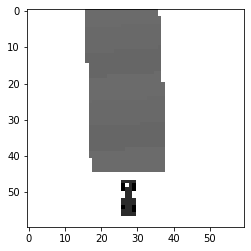

In [55]:
def feat_extract_final(X):
    gray = rgb2gray(X)[:,20:80,20:80]
    gray[gray>0.43] = 1
    gray_test = gray[0]
    obs_filter = np.zeros(gray.shape)
    for i in range(len(X)):
        obs_filter[i] = filters.sobel(gray[i])
    obs_filter = obs_filter.reshape(obs_filter.shape[0], obs_filter.shape[1]*obs_filter.shape[2]) 
    plt.imshow(gray_test,cmap='gray')
    return obs_filter

def feature_vector_final(X):
    gray = rgb2gray(X)[20:80,20:80]
    gray[gray>0.43] = 1
    gray_test = gray[0]
    obs_filter = filters.sobel(gray)
    obs_filter = obs_filter.reshape(1, obs_filter.shape[0]*obs_filter.shape[1]) 
    return obs_filter

feat_extract_final(observations[10001:10003])

In [46]:
## We only used data from earth, now we will use data from Mars an Saturn
samples = observations[0:10000]
sample_actions = actions[0:10000]
# samples_val = observations[10000:14000]
# sample_actions_val = actions[10000:14000]

## Distribute actions more evenly
samples_distributed, sample_actions_distributed = distribute(samples, sample_actions, 0, 800, 1200, 0, 0, 2500)
# samples_val_distributed, sample_val_actions_distributed = distribute(samples_val, sample_actions_val, 0, 250, 450, 0, 0, 1000)
print(np.bincount(sample_actions_distributed))
# print(np.bincount(sample_val_actions_distributed))

# Extract features of the samples
X_final_train, y_final_train = feat_extract(samples_distributed), sample_actions_distributed
# X_final_val, y_final_val = feat_extract(samples_val_distributed), sample_val_actions_distributed
pca = PCA(n_components = 0.95)

# Prepare data for neural network
X_final_train_pca = pca.fit_transform(X_final_train)
# X_final_val_pca = pca.transform(X_final_val)
y_one_hot_final_train = one_hot_encoding(y_final_train)
# y_one_hot_final_val = one_hot_encoding(y_final_val)

# # Neural network settings
learning_rate = 0.01
n_neurons = 10
n_hidden = 2
epochs = 50
early_stopping = keras.callbacks.EarlyStopping(patience=8)
nn_final = neural_network()
nn_final.fit(X_final_train_pca, y_one_hot_final_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size,callbacks=[early_stopping])

# y_val_pred = nn_final.predict(y_final_val)
# y_final_pred = np.argmax(y_val_pred, axis=0)

# print(y_val_pred)
# print(y_val_pred.shape)
# print(y_final_val)
# print(y_final_val.shape)

# Score metrics
# accuracy = sklearn.metrics.accuracy_score(y_final_val, y_val_pred) 
# f1score = f1_score(y_final_val, y_val_pred, average='macro')
# print(f1score)

[2500 1700 1300 1180]
Train on 5344 samples, validate on 1336 samples
Epoch 1/50
5344/5344 [==============================] - 1s 167us/sample - loss: 1.1795 - acc: 0.5818 - val_loss: 1.4127 - val_acc: 0.2822
Epoch 2/50
5344/5344 [==============================] - 1s 138us/sample - loss: 1.0712 - acc: 0.6067 - val_loss: 1.3615 - val_acc: 0.4731
Epoch 3/50
5344/5344 [==============================] - 1s 127us/sample - loss: 1.0521 - acc: 0.6201 - val_loss: 1.1696 - val_acc: 0.4895
Epoch 4/50
5344/5344 [==============================] - 1s 129us/sample - loss: 1.0427 - acc: 0.6158 - val_loss: 1.2211 - val_acc: 0.5254
Epoch 5/50
5344/5344 [==============================] - 1s 131us/sample - loss: 1.0276 - acc: 0.6158 - val_loss: 1.2049 - val_acc: 0.4731
Epoch 6/50
5344/5344 [==============================] - 1s 122us/sample - loss: 1.0273 - acc: 0.6304 - val_loss: 1.4108 - val_acc: 0.3540
Epoch 7/50
5344/5344 [==============================] - 1s 132us/sample - loss: 1.0392 - acc: 0.6196 -

### Save and Load

In [54]:
from tensorflow.keras.models import load_model
# nn_final = load_model('final_neural_network_model.h5')
nn_final.save(r'C:\Users\jobmu\OneDrive\Documenten\final_neural_network_model.h5')


AttributeError: 'str' object has no attribute 'decode'

---

# 5. Present Your Solution (5 points)
1. Summarize your main decisions and insights
2. Create a stand-alone demo. I.e., a block of cells that can be run on its own. For that you will need to load your pre-trained best model you saved in the previous section and run it on a Neptune track.


### Conclusion and insights

For the final model we decided to train a neural network for a good performance of the racing car. The performance at the beginning was poor so we started to optimize the neural network. After a lot of iterations we figured out that even though the accuracy did not improve, had a better performance on the track. Also the f1 score did not always indicate a good performance of the track. The methodology of filtering out the background color which indicates the planet did not work out as we expected. Even though the racing car performs well on earth, mars and saturn, the performance on neptune is very poor. Although the performance of our model is not the best, the assignment gave us insights of how to and how not to build a model for such tasks.
There are a lot of insights we had this practicum. We spent multiple days from 9am to 12pm to perform iterations trying to improve the metrics. After some time we found out that the f1 score an accuracy did not immediately improve the performance of the racing car. We figured out that one of the most important steps of building a model is the preprocessing of the data. 

The performance on earth, mars and saturn were good. However, the performance on neptune was very poor. This means we probably overfitted the model on the data. What would have been better was, besides training the model on the earth data, to validate the model on only one unknown planet and perform the test on the last unknown planet. In this way, the f1 score and the accuracy tells much more about the performance of the model which could result in a better performance on neptune. Since we ran out of time, we could not implement this insight on time. 

In [57]:
import random 
def f_policy_neural_network(observation):
    observation = feature_vector_final(observation)
    observation = pca.transform(observation)
    action = np.argmax(nn_final.predict(observation))
    
    print(f'Received observation: {observation.shape} numpy array of type {observation.dtype}, returning action {action}')
    return action

In [59]:
rs = run_simulation(f_policy_neural_network, render=1, planet_id=2, track_id=8)

Starting simulation for 500 iterations.
*** Press ESC key in popup window to stop the simulation! ***

Track generation: 1216..1525 -> 309-tiles track
Received observation: (1, 759) numpy array of type float64, returning action 1


C:\Users\jobmu\Miniconda3\envs\tf2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type f

Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type float64, returning action 1
Received observation: (1, 759) numpy array of type f

Received observation: (1, 759) numpy array of type float64, returning action 0
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 0
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type f

Received observation: (1, 759) numpy array of type float64, returning action 0
Received observation: (1, 759) numpy array of type float64, returning action 0
Received observation: (1, 759) numpy array of type float64, returning action 0
Received observation: (1, 759) numpy array of type float64, returning action 0
Received observation: (1, 759) numpy array of type float64, returning action 0
Received observation: (1, 759) numpy array of type float64, returning action 0
Received observation: (1, 759) numpy array of type float64, returning action 0
Received observation: (1, 759) numpy array of type float64, returning action 0
Received observation: (1, 759) numpy array of type float64, returning action 2
Received observation: (1, 759) numpy array of type float64, returning action 0
Received observation: (1, 759) numpy array of type float64, returning action 2
Received observation: (1, 759) numpy array of type float64, returning action 2
Received observation: (1, 759) numpy array of type f

Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type float64, returning action 3
Received observation: (1, 759) numpy array of type f